In [81]:
import numpy as np
import cPickle as pickle

In [121]:
import stimuli as s

In [124]:
experiments = ['angle', 'length', 'direction', 'position_common_scale', 
               'position_non_aligned_scale', 'area', 'volume', 'curvature']
MLAE = dict()
for e in experiments:
    MLAE[e] = []
    if 'position' in e:
        n = 0
    else:
        n = 0
    for i in range(1, 5):
        with open('RESULTS/s.Figure5.'+e+'/' + str(n) + '/VGG19/' + str(i) + '.p', 'r') as f:
            MLAE[e].append(pickle.load(f)['MLAE'])
            

In [132]:
MLAE_angle = [[]]
for i in range(8):
    MLAE_angle.append([])
    for j in range(1, 5):
        with open('RESULTS/s.Figure5.angle/' + str(i) + '/VGG19/' + str(j) + '.p', 'r') as f:
                MLAE_angle[i].append(pickle.load(f)['MLAE'])
MLAE_aa = []
for i in range(8):
    MLAE_angle[i] = sort(MLAE_angle[i])
    MLAE_aa.append(((MLAE_angle[i][1] + MLAE_angle[i][2]) / 2, np.std(np.array(MLAE_angle[i]))))
print MLAE_aa[1]

(4.2855719211839762, 0.0028671401830072194)


In [109]:
sort(MLAE['direction'])
print MLAE['direction']

[4.2751088576367557, 4.2739212038732344, 4.2734406322574108, 4.271098650283621]


In [125]:
VGG_MLAE_average = dict()
for e in experiments:
    MLAE[e] = sort(MLAE[e])
    VGG_MLAE_average[e] = (MLAE[e][1] + MLAE[e][2]) / 2, np.std(np.array(MLAE[e]))
print VGG_MLAE_average

{'direction': (4.6544545509455268, 0.0013062573291417565), 'angle': (4.6667299095043884, 0.0025548192752843854), 'area': (4.8247262589900863, 0.0092344452096892581), 'curvature': (4.6921064692637042, 0.0052971648128280497), 'volume': (4.7291157556899543, 0.044061512880987939), 'position_common_scale': (4.6760958578569083, 0.0018360334747552752), 'length': (4.7027531798667859, 0.0025146468059084985), 'position_non_aligned_scale': (4.6785341598732, 0.0019628576815574564)}


In [114]:
def mlae(i):
    return np.log2(i+.125)

In [115]:
human_MLAE_average = dict()
human_MLAE_average['position_common_scale'] = 8.7 #is the STD the lines on the side?
human_MLAE_average['position_non_aligned_scale'] = 8.4
human_MLAE_average['length'] = 9.1
human_MLAE_average['direction'] = 10
human_MLAE_average['angle'] = 10.1
human_MLAE_average['area'] = 13.2
for a in human_MLAE_average:
    human_MLAE_average[a] = mlae(human_MLAE_average[a])
print human_MLAE_average

{'direction': 3.3398500028846247, 'angle': 3.3540289380543866, 'area': 3.7360636278718133, 'position_common_scale': 3.1415962783838181, 'length': 3.2055489111730338, 'position_non_aligned_scale': 3.09169983413681}


In [116]:
CP_MLAE_average = dict()
CP_MLAE_average['position_common_scale'] = -0.04
CP_MLAE_average['position_non_aligned_scale'] = 0.26
CP_MLAE_average['length'] = -0.14
CP_MLAE_average['direction'] = 0.92
CP_MLAE_average['angle'] = 0.66
CP_MLAE_average['area'] = -0.17
CP_MLAE_average['volume'] = 0.87
CP_MLAE_average['curvature'] = 0.28
print CP_MLAE_average

{'direction': 0.92, 'angle': 0.66, 'area': -0.17, 'curvature': 0.28, 'volume': 0.87, 'position_common_scale': -0.04, 'length': -0.14, 'position_non_aligned_scale': 0.26}


In [126]:
su = 0
for e in experiments:
    su += VGG_MLAE_average[e][0]
print su / len(experiments)

4.70306451775


In [118]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [119]:
from matplotlib import gridspec

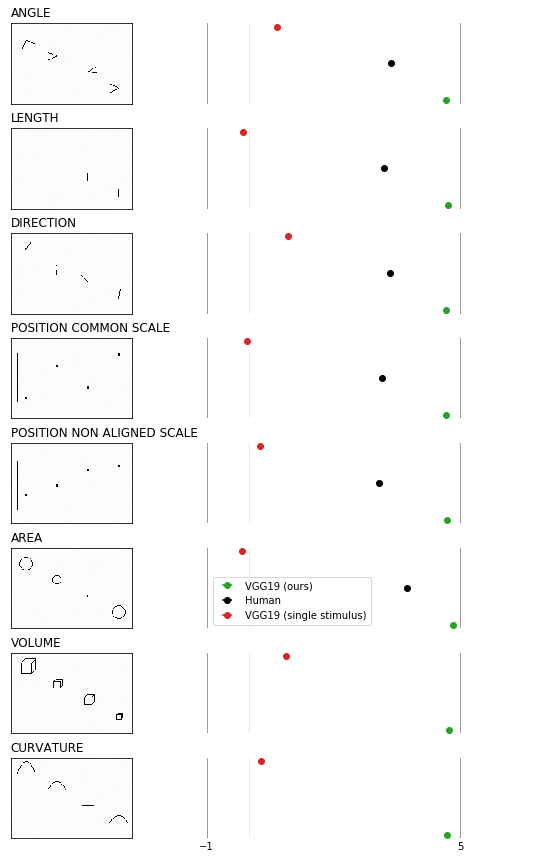

In [127]:
types = ['image', 'VGG', 'human', 'CP']
labels = ['image', 'VGG19 (ours)', 'Human', 'VGG19 (single stimulus)']

fig = plt.figure(figsize=(10,15), facecolor='white')
gs = gridspec.GridSpec(len(experiments), 2, width_ratios=[.5,1], hspace=.3)#, wspace=.5)

j=0
for z,e in enumerate(experiments):
    
    for i,t in enumerate(types):
        
        if i == 0:
            

            fig = plt.subplot(gs[j])
            j += 1
            
            if not 'position' in e:
                plt.title(e.upper(), loc='left')
            elif e == 'position_common_scale':
                plt.title('POSITION COMMON SCALE', loc='left')
            elif e == 'position_non_aligned_scale':
                plt.title('POSITION NON ALIGNED SCALE', loc='left')
            
            ax = plt.gca()
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none') 
            ax.yaxis.set_major_formatter(NullFormatter())
            ax.yaxis.set_ticks_position('none') 
            plt.tight_layout()

            image = eval('s.Figure5.'+e)
#             print image
            image = image([True, False, True])[1].astype(np.float32)
            image += np.random.uniform(0, 0.05,(100,150))
            
            ax.set_xticklabels('')
            ax.set_yticklabels('')
            ax.set_xticks(np.arange(-.5, 100, 10), minor=False);
            ax.set_yticks(np.arange(-.5, 100, 10), minor=False);
        #     ax.grid(which='major', color='gray', linestyle=':', linewidth='0.5')
            ax.set_axisbelow(True)

            plt.imshow(image, cmap='Greys', interpolation='none')
            
            continue

#         if j <= len(classifiers)+1:
#             plt.title(c)
            
        if i == 1:
            fig = plt.subplot(gs[j])
            j += 1

        if t == 'Dummy':
            errorbars = plt.errorbar([100], y_pos[-1]+1, xerr=[0], fmt='o')
            continue
            
        if e == 'volume' and t =='human':
            continue
        if e == 'curvature' and t =='human':
            continue
            
        data = eval(t+'_MLAE_average')[e]
        
        if t=='human' or t=='CP':
            data = [data, 0]
        
        confidence = [0,0]
        
        
        
        
        y_pos = i

        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
#         if i != 1:
#             ax.get_yaxis().set_ticks([])
#         else:
#         print labels
# \

        ax.get_yaxis().set_ticks(range(len(labels)), minor=False) # we set the labels here
        ax.get_yaxis().set_ticks([])     

#         ax.get_yaxis().set_ticks(range(len_c-1,min((len_c-1)*len_labels+len_c,mmax),len_c), minor=True)
#         print (len_c-1)*len_labels+len_c, len(labels)
#         print range(len_c-1,(len_c-1)*len_labels+len_c,len_c)
        ax.get_xaxis().set_ticks(np.arange(-1,7,6)) # mark the tange
        ax.get_xaxis().set_ticks(np.arange(0,0.1), minor=True) # mark the center
        ax.tick_params(axis=u'both', which=u'both',length=0)

        # remove tick marks
        if z<7:# <= 3*(len(experiments)-1):
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none')
        plt.xlim(-1,7)


        # grid lines for X
        plt.grid(True, color='gray', which='major', axis='x', alpha=1)
        plt.grid(True, color='gray', which='minor', axis='x', alpha=0.2)
        
        
        color = 'C3'
        
        if i == 1:
            # VGG19 (ours)
            color = 'C2'
        elif i == 2:
            color = 'black'
        
        
        
#         print data, y_pos, confidence
        errorbars = plt.errorbar(data[0], y_pos, xerr=data[1], fmt='o', color=color, label=labels[i])
    if z==5:
        plt.legend(loc='upper right', bbox_to_anchor=(0.5, 0.7))
plt.savefig('/tmp/results.pdf', bbox_inches='tight', pad_inches=0)